In [1]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mc

from tqdm.auto import tqdm

import numpy as np
import pandas as pd

from pypop.prv import PRV

# Loading raw Extrae Trace Data

Raw trace data can be loaded using the PRV class from `pypop.prv`:

In [2]:
testfile_path="./omp_detail.prv.gz"
prv = PRV(testfile_path)

This results in a PRV object containing the events, communications and running state data in three dataframes:

In [3]:
display(prv.state)

cpu       endtime  state
task thread time                                  
1    1      0               1       1199254      1
            1199254         1       1199736     15
            1199736         1       1246944      1
            1246944         1       1250826      5
            1250826         1       1270295      1
...                       ...           ...    ...
     8      145425924908    8  145425929973      5
            145425929973    8  145425930796      1
            145425930796    8  145425931595      5
            145425931595    8  145426228014      1
            146371193395    8  146371409788     12

[1779463 rows x 3 columns]

In [4]:
display(prv.event)

cpu     event         value
task thread time                                     
1    1      0               1  40000001  1.000000e+00
            0               1  40000050  6.665839e+13
            0               1  40000033  7.000000e+00
            0               1  40000133  0.000000e+00
            0               1  40000018  1.000000e+00
...                       ...       ...           ...
     8      145426228014    8  42000008  4.598175e+18
            145426228014    8  42000055  9.483481e+13
            145426228014    8  42001047  1.407235e+14
            146371193395    8  40000003  1.000000e+00
            146371409788    8  40000003  0.000000e+00

[16885618 rows x 3 columns]

Note that in the case of a pure OpenMP code there are no MPI communications and so the `comm` attribute will be `None`

In [5]:
display(prv.comm)

None

In [6]:
omp_region_stats = prv.profile_openmp_regions()

A Jupyter Widget

<IPython.core.display.Javascript object>


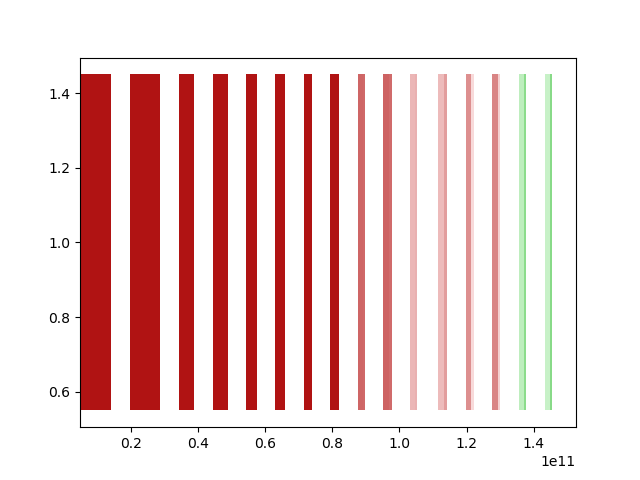

In [7]:
bad_thres = 0.5
good_thres = 0.8
cmap_points = [(0.0, (
    0.690, 0.074, 0.074)),
               (bad_thres, (0.690, 0.074, 0.074)),
               (good_thres-1e-20, (0.992, 0.910, 0.910)),
               (good_thres, (0.910, 0.992, 0.910)),
               (1.0, (0.074, 0.690, 0.074))]

metric_cmap = mc.LinearSegmentedColormap.from_list('POP_Metrics', colors=cmap_points, N=256, gamma=1)

for rank, rankdata in omp_region_stats.groupby(level='rank'):
    plt.barh(rank,
             rankdata['Region End'] - rankdata['Region Start'],
             0.9,
             rankdata['Region Start'],
             color=metric_cmap(rankdata['Load Balance']))

In [8]:
prv.openmp_region_summary()

,Instances,Load Balance,Parallel Efficiency,Average Computation Time,Maximum Computation Time,Region Functions
Region Fingerprint,,,,,,
3,16,0.388298,0.386530,1.010185e+09,6934777630,GetPixelBlue
4,16,0.429397,0.422728,3.987496e+08,2234636901,GetPixelGreen
